# HYPOTHESIS TESTING EXERCISES - SOLUTION

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

## EXERCISE 1 - BENFORD'S LAW

Verify the validity of Benford's law when applied to 1) the population of a country; 2) the number of breast cancer cases in each country.

1. Collect a count of the first digits of all the numbers in the data sets.
2. Use a statistical test to compare the observed count to the one expected by Benford's law.

In [19]:
# Load the data set from the `statsmodel` package.
import statsmodels.api as sm
data = sm.datasets.cancer.load_pandas()

population = data.data['population']
cancer = data.data['cancer']

In [20]:
# Compute Benford's distribution.
# This is the distribution we need to compare against.
digits = np.arange(1, 10)
benford_distribution = np.log10(1.0 + 1.0/digits)

In [21]:
def first_digit(x):
    """ Extract the first digit of a positive integer. """
    first_char = str(x)[0]
    return int(first_char)

First, for the population size.

In [22]:
digits = population.apply(first_digit)

In [26]:
print len(population), len(digits)

301 301


In [27]:
# Counts of first digits.
g = population.groupby(digits)
counts = g.count()
print counts

population
1             78
2             69
3             37
4             25
5             20
6             24
7             21
8             14
9             13
Name: population, dtype: int64


In [30]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

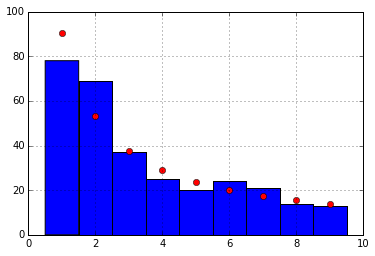

In [28]:
# Compare to Benford's law prediction, visually.
predicted_counts = benford_distribution * len(population)
digits.hist(bins=np.arange(1, 11) - 0.5)
plt.plot(range(1, 10), predicted_counts, 'ro');

In [29]:
# Use the Chi Square test to compare the two distributions.
stat, p_value = stats.chisquare(counts, predicted_counts)
print 'Chi-squared=%.2f, P=%.2f' % (stat, p_value)

Chi-squared=9.43, P=0.31


We cannot reject the hypothesis that the population size data follows Benford's law.

Let's do the same for the breast cancer data.

In [31]:
# Remove rows with 0 cases.
cancer = cancer[cancer > 0]

# Counts of first digits.
digits = cancer.apply(first_digit)
counts = population.groupby(digits).count()
print counts

cancer
1         96
2         50
3         36
4         31
5         20
6         20
7         19
8         13
9         15
Name: population, dtype: int64


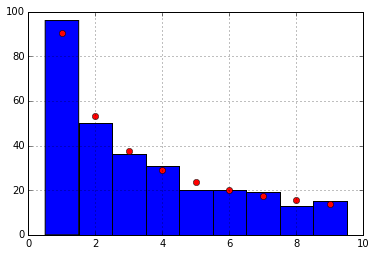

In [32]:
# Compare to Benford's law prediction, visually.
predicted_counts = benford_distribution * len(population)
digits.hist(bins=np.arange(1, 11) - 0.5)
plt.plot(range(1, 10), predicted_counts, 'ro');

In [33]:
# Use the Chi Square test to compare the two distributions.
stat, p_value = stats.chisquare(counts, predicted_counts)
print 'Chi-squared=%.2f, P=%.2f' % (stat, p_value)

Chi-squared=1.91, P=0.98


We cannot reject the hypothesis that the number of breast cancer cases follows Benford's law.

## EXERCISE 2 - SUNSPOTS

Use a statistical test to check if the number of sunspots has increased significantly in the past 300 years.

Given a yearly count of the number of sunspots, from 1700 to 2008:
1. Divide the data into two halves.
2. Compare the distribution of the two halves statistically. Are the two distributions significantly different?

Hint: use stats.ranksums for comparisons.

In [12]:
data = sm.datasets.sunspots.load_pandas()
df = data.data
df = df.set_index('YEAR')

In [13]:
df.head()

,SUNACTIVITY
YEAR,
1700,5
1701,11
1702,16
1703,23
1704,36


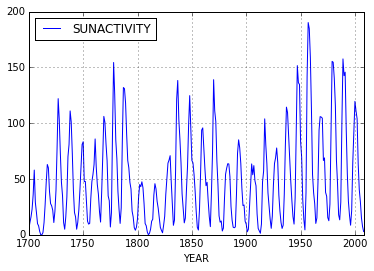

In [14]:
df.plot()

In [15]:
half = len(df) // 2
first = df.iloc[:half, 0]
second = df.iloc[half:, 0]
print 'Mean until {:d}: {}'.format(int(df.index[half]), first.mean())
print 'Mean from {:d}: {}'.format(int(df.index[half]), second.mean())

Mean until 1854: 44.112987013
Mean from 1854: 55.3548387097


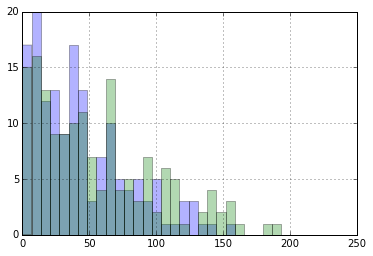

In [16]:
bins = np.linspace(0, 200, 30)
first.hist(bins=bins, alpha=0.3)
second.hist(bins=bins, alpha=0.3)

In [17]:
t, p = stats.ranksums(first.dropna(), second.dropna())
print 'P value = {:.6f}'.format(p)

P value = 0.051598


The two distributions are not significantly different, so we cannot claim that the number of sunspots has increased in the second period.

## EXERCISE 3 - AGE OF RENTERS

Is the age of people who own their own house significantly different from the age of people who rent?

We are given a data set containing 5 columns:
```
AVGEXP - Average expenditure on a credit card
AGE - Age
INCOME - Income
INCOMESQ - Income squared
OWNRENT - 1 if the subject owns its own house, 0 otherwise
```

1. Split the data set into owners and renters.
2. Use an appropriate statistical test to check if the distribution of age in the two groups is significantly different.

In [18]:
data = sm.datasets.ccard.load_pandas()
df = data.data

In [19]:
df.head()

,AVGEXP,AGE,INCOME,INCOMESQ,OWNRENT
0,124.98,38,4.52,20.4304,1
1,9.85,33,2.42,5.8564,0
2,15.00,34,4.50,20.2500,1
3,137.87,31,2.54,6.4516,0
4,546.50,32,9.79,95.8441,1


In [20]:
renters = df[df['OWNRENT'] == 0]
owners = df[df['OWNRENT'] == 1]

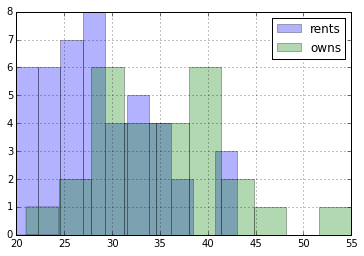

In [21]:
bins=10
renters.AGE.hist(bins=bins, alpha=0.3)
owners.AGE.hist(bins=bins, alpha=0.3)
plt.legend(['rents', 'owns'])

In [22]:
t, p = stats.ranksums(renters.AGE, owners.AGE)
print 'P value = {:.6f}'.format(p)

P value = 0.000254


We can reject the hypothesis that the distribution of age of renters and owners are the same.

## EXERCISE 4 - FAIR DIE

 A six-sided die is rolled 50 times, and the number of occurrences
   of each side are recorded in the following table:

      +-------------+------+------+------+------+------+------+
      | Side        |   1  |   2  |   3  |   4  |   5  |   6  |
      +-------------+------+------+------+------+------+------+
      | Occurrences |   6  |   1  |   9  |   7  |  14  |  13  |
      +-------------+------+------+------+------+------+------+

   Is the die fair?   That is, is each side equally likely?  Run a chi square test.


In [9]:
num = np.array([6, 1, 9, 7, 14, 13])

pc = num.sum() / 6.0
predicted_counts = np.array([pc, pc, pc, pc, pc, pc])

chi2, p = stats.chisquare(num, predicted_counts)

print "p = {:6.4f}".format(p)
if p < 0.05:
    print "Reject H0: the die is not fair."
else:
    print "Do not reject H0: the die might be fair."

p = 0.0167
Reject H0: the die is not fair.
